### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df = pd.concat([tienda, tienda2, tienda3, tienda4])

df.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [ ]:
ingresos_por_tienda = df.groupby("Tienda")["Precio"].sum().reset_index()
ingresos_por_tienda.columns = ["Tienda", "Ingreso Total"]

print(ingresos_por_tienda)

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


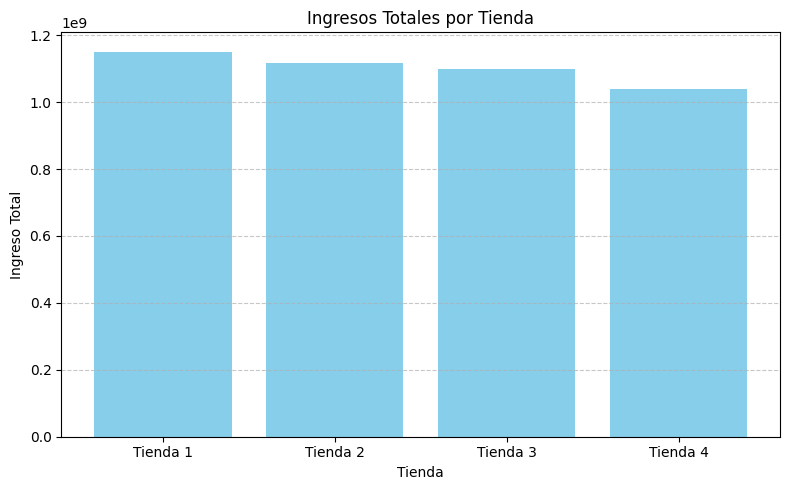

In [ ]:
import matplotlib.pyplot as plt

# Configuración del gráfico
plt.figure(figsize=(8, 5))
plt.bar(ingresos_por_tienda["Tienda"], ingresos_por_tienda["Ingreso Total"], color='skyblue')
plt.title("Ingresos Totales por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingreso Total")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# 2. Ventas por categoría

In [ ]:
ventas_por_categoria = df.groupby(["Tienda", "Categoría del Producto"])["Producto"].count().reset_index()
ventas_por_categoria.columns = ["Tienda", "Categoría", "Cantidad Vendida"]

print(ventas_por_categoria)


      Tienda                Categoría  Cantidad Vendida
0   Tienda 1  Artículos para el hogar               171
1   Tienda 1     Deportes y diversión               284
2   Tienda 1        Electrodomésticos               312
3   Tienda 1             Electrónicos               448
4   Tienda 1   Instrumentos musicales               182
5   Tienda 1                 Juguetes               324
6   Tienda 1                   Libros               173
7   Tienda 1                  Muebles               465
8   Tienda 2  Artículos para el hogar               181
9   Tienda 2     Deportes y diversión               275
10  Tienda 2        Electrodomésticos               305
11  Tienda 2             Electrónicos               422
12  Tienda 2   Instrumentos musicales               224
13  Tienda 2                 Juguetes               313
14  Tienda 2                   Libros               197
15  Tienda 2                  Muebles               442
16  Tienda 3  Artículos para el hogar           

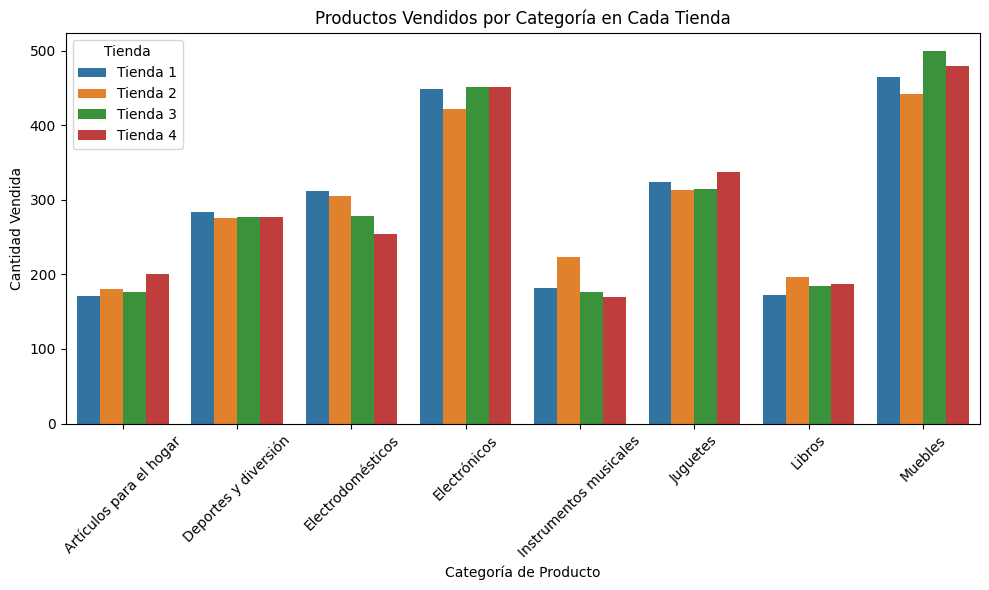

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))

sns.barplot(
    data=ventas_por_categoria,
    x="Categoría", y="Cantidad Vendida", hue="Tienda"
)

plt.title("Productos Vendidos por Categoría en Cada Tienda")
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
calificaciones_por_tienda = df.groupby("Tienda")["Calificación"].mean().reset_index()
calificaciones_por_tienda.columns = ["Tienda", "Calificación Promedio"]

print(calificaciones_por_tienda)


     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


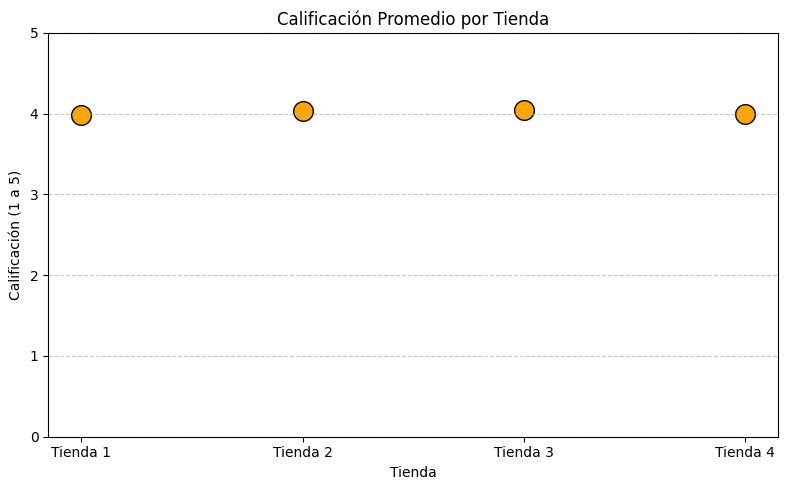

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(
    x=calificaciones_por_tienda["Tienda"],
    y=calificaciones_por_tienda["Calificación Promedio"],
    s=200, c="orange", edgecolors="black"
)

plt.title("Calificación Promedio por Tienda")
plt.ylim(0, 5)
plt.ylabel("Calificación (1 a 5)")
plt.xlabel("Tienda")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()




# 4. Productos más y menos vendidos

In [ ]:
ventas_por_producto = df.groupby(["Tienda", "Producto"])["Producto"].count().reset_index(name="Cantidad Vendida")

ventas_por_producto.head()





,Tienda,Producto,Cantidad Vendida
0,Tienda 1,Ajedrez de madera,49
1,Tienda 1,Armario,60
2,Tienda 1,Asistente virtual,40
3,Tienda 1,Auriculares,50
4,Tienda 1,Auriculares con micrófono,33


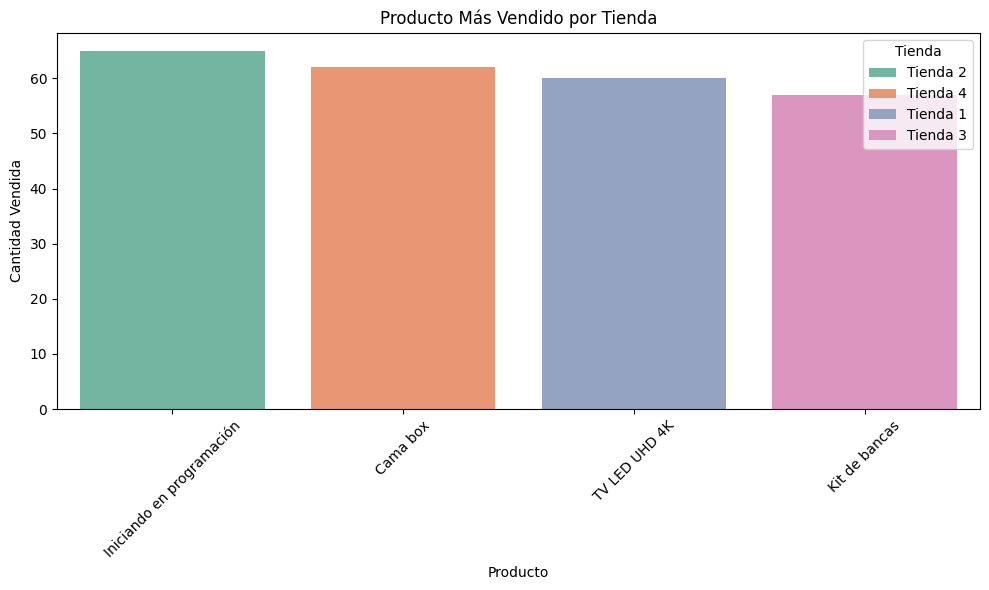

In [ ]:
mas_vendidos = ventas_por_producto.sort_values("Cantidad Vendida", ascending=False).groupby("Tienda").head(1)

plt.figure(figsize=(10, 6))
sns.barplot(data=mas_vendidos, x="Producto", y="Cantidad Vendida", hue="Tienda", palette="Set2")

plt.title("Producto Más Vendido por Tienda")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


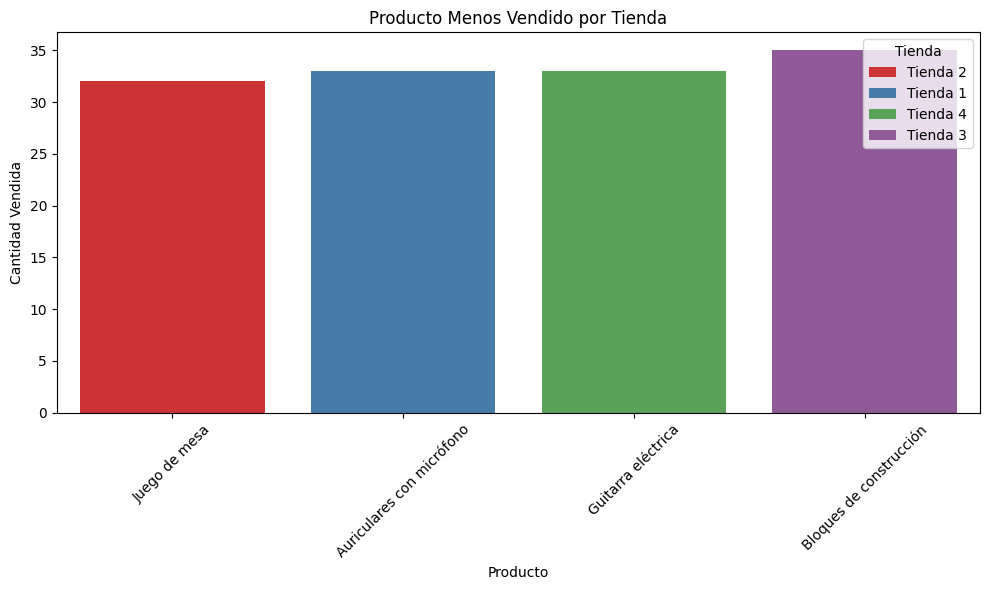

In [ ]:
menos_vendidos = ventas_por_producto.sort_values("Cantidad Vendida", ascending=True).groupby("Tienda").head(1)

plt.figure(figsize=(10, 6))
sns.barplot(data=menos_vendidos, x="Producto", y="Cantidad Vendida", hue="Tienda", palette="Set1")

plt.title("Producto Menos Vendido por Tienda")
plt.xlabel("Producto")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [ ]:
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().reset_index()
envio_promedio.columns = ["Tienda", "Costo Promedio de Envío"]

print(envio_promedio)


     Tienda  Costo Promedio de Envío
0  Tienda 1             26018.609580
1  Tienda 2             25216.235693
2  Tienda 3             24805.680373
3  Tienda 4             23459.457167


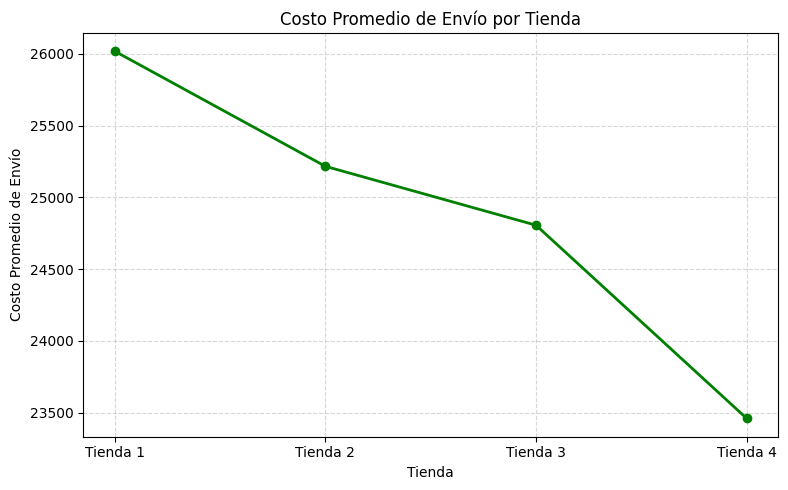

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(envio_promedio["Tienda"], envio_promedio["Costo Promedio de Envío"],
         marker="o", linestyle="-", color="green", linewidth=2)

plt.title("Costo Promedio de Envío por Tienda")
plt.xlabel("Tienda")
plt.ylabel("Costo Promedio de Envío")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
